In [28]:
import numpy as np

In [225]:
import pandas as pd

In [182]:
import matplotlib.pyplot as pp

## Sampling from a Single Node Poisson Nets

In [224]:
%%latex
\begin{align}
\text{Number of nodes} \space V = 1 \\
\text{Nodes list } \{ A \}\\
\text{Time window duration} \space \phi = 1 \\
\text{Average succes rate per unit of time} \space \lambda = \frac{1}{40} \\
\text{time serie lenght} \space N = 100
\end{align}

<IPython.core.display.Latex object>

In [173]:
phi=1
lambda_ = 1/40
N = 100

In [174]:
#waiting time between two events is given by the exp. distribution.
#the cumulitative exp. distribution compute is used to compute the probability of 
#an occurence of an events within the next x units of times.

#source: https://preshing.com/20111007/how-to-generate-random-timings-for-a-poisson-process/ 
def F(x):
    return 1 - np.exp(x/40*-lambda_)

In [175]:
#after 40mins we highly expect a succes.
print(F(40))
#after 2secs, we are less likely to have any succes.
print(F(0.2))

0.0246900879717
0.000124992187825


In [176]:
#random points from the y-axis (probabilities)
Y = np.random.uniform(size=N)

In [177]:
#corresponding x-values, waiting times
T = -np.log(1-Y) / lambda_

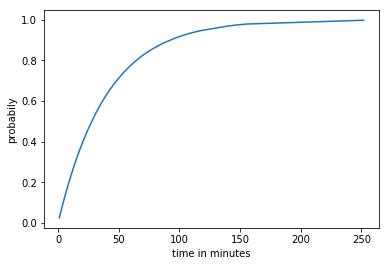

Text(0,0.5,'probabily')

In [199]:
#as expected 
pp.plot(T[np.argsort(T)], Y[np.argsort(T)])
pp.show()
pp.xlabel('time in minutes')
pp.ylabel('probabily')

In [181]:
#notice how the observed average rate is almost equal to lambda_
print(T.mean())

40.7359999055


In [205]:
#we sampled waiting times, the corresponding time serie is:
Ts = np.cumsum(T)

In [236]:
events = np.repeat('A', N)

In [247]:
sampled_data = pd.DataFrame(data={'time': Ts, 'event': events})

In [248]:
sampled_data

,event,time
0,A,65.794927
1,A,89.816286
2,A,102.389363
3,A,174.519004
4,A,229.346434
5,A,261.054255
6,A,277.325759
7,A,278.336769
8,A,388.818199
9,A,391.046200
